<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Artificial Neural Network with **real** oversampled data
Authorship: Raul Macedo

In [1]:
#General imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from utils import train_model_if_doesnt_exist,save_csv_if_doesnt_exist
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [2]:
train_fill_real1 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test_fill_real1 = pd.read_csv('./oversampling/oversampling_with_real_data/test_real_filled_data1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train_fill_real2 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test_fill_real2 = pd.read_csv('./oversampling/oversampling_with_real_data/test_real_filled_data2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train_fill_real3 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test_fill_real3 = pd.read_csv('./oversampling/oversampling_with_real_data/test_real_filled_data3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})

In [3]:
train_in1_real = train_fill_real1.drop(columns=['class']).copy()
test_in1_real = test_fill_real1.drop(columns=['class']).copy()
train_out1_real = pd.DataFrame(train_fill_real1['class'])
test_out1_real = pd.DataFrame(test_fill_real1['class'])

train_in2_real = train_fill_real2.drop(columns=['class']).copy()
test_in2_real =test_fill_real2.drop(columns=['class']).copy()
train_out2_real =pd.DataFrame(train_fill_real2['class'])
test_out2_real =pd.DataFrame(test_fill_real2['class'])

train_in3_real = train_fill_real3.drop(columns=['class']).copy()
test_in3_real =test_fill_real3.drop(columns=['class']).copy()
train_out3_real = pd.DataFrame(train_fill_real3['class'])
test_out3_real =pd.DataFrame(test_fill_real3['class'])

In [4]:

def normalize_data(data,range_=(0,1)):
  scaler = MinMaxScaler(feature_range=range_)
  return scaler.fit_transform(data),scaler


train_in1n,scaler_train_in1n = normalize_data(train_in1_real)
test_in1n,scaler_test_in1n = normalize_data(test_in1_real)
train_out1n,scaler_train_out1n = normalize_data(train_out1_real)
test_out1n,scaler_test_out1n = normalize_data(test_out1_real)

train_in2n,scaler_train_in2n = normalize_data(train_in2_real)
test_in2n,scaler_test_in2n = normalize_data(test_in2_real)
train_out2n,scaler_train_out2n = normalize_data(train_out2_real)
test_out2n,scaler_test_out2n = normalize_data(test_out2_real)

train_in3n,scaler_train_in3n = normalize_data(train_in3_real)
test_in3n,scaler_test_in3n = normalize_data(test_in3_real)
train_out3n,scaler_train_out3n = normalize_data(train_out3_real)
test_out3n,scaler_test_out3n = normalize_data(test_out3_real)


train_out1n_real = np.ravel(train_out1n)
train_out2n_real = np.ravel(train_out2n)
train_out3n_real = np.ravel(train_out3n)


## **Case 1: Using GridSearchCV to determine MLP parameters and train model**

In [5]:
parameters1 = {
    'hidden_layer_sizes': [(6,),(10,),(15,),(6,6),(6,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron_real1 = train_model_if_doesnt_exist(train_in1n,train_out1n,parameters1,'./ann_models/after_data_filling/real_filled/ultron1_real1_PRP.pkl')

In [6]:
ultron_real1

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 6), max_iter=100)

Text(0, 0.5, 'erro')

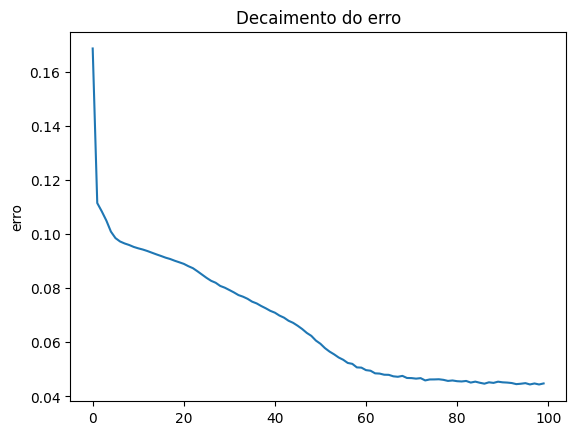

In [7]:
plt.plot(ultron_real1.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 1**

In [8]:
def plot_confusion_matrix(observed_data:np.ndarray,predicted_data:np.ndarray):
    mat = confusion_matrix(observed_data,predicted_data)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',linewidths=1)
    plt.xlabel('Observed')
    plt.ylabel('Predict')
    return

def save_classifaction_report(observed_data,predicted_data,file_name:str):
    cls_report = classification_report(observed_data,predicted_data,output_dict=True)
    cls_report_df = pd.DataFrame(cls_report)
    accuracy = accuracy_score(observed_data,predicted_data)
    cls_report_df['accuracy'] = accuracy
    save_csv_if_doesnt_exist(cls_report_df,file_name)
    print(cls_report_df)
    return

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.968830      0.989711  0.979224       0.979270       0.979444
recall         0.989583      0.969205  0.979224       0.979394       0.979224
f1-score       0.979096      0.979351  0.979224       0.979224       0.979226
support    95610.000000  98848.000000  0.979224  194458.000000  194458.000000


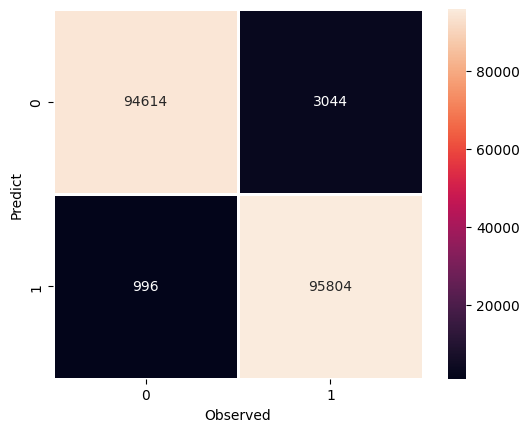

In [9]:
out1_pred = ultron_real1.predict(test_in1n)

out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_test_out1n.inverse_transform(out1_pred_df)

save_classifaction_report(test_out1_real,out_des_pred1,'./ann_models/after_data_filling/real_filled/reports/ultron_real1_test_report.csv')

plot_confusion_matrix(test_out1_real,out_des_pred1)

### **Analising model with train data - case 1**

                     0.0            5.0  accuracy      macro avg  \
precision       0.969695       0.989865  0.979695       0.979780   
recall          0.989827       0.969806  0.979695       0.979816   
f1-score        0.979657       0.979733  0.979695       0.979695   
support    224120.000000  229615.000000  0.979695  453735.000000   

            weighted avg  
precision       0.979902  
recall          0.979695  
f1-score        0.979696  
support    453735.000000  


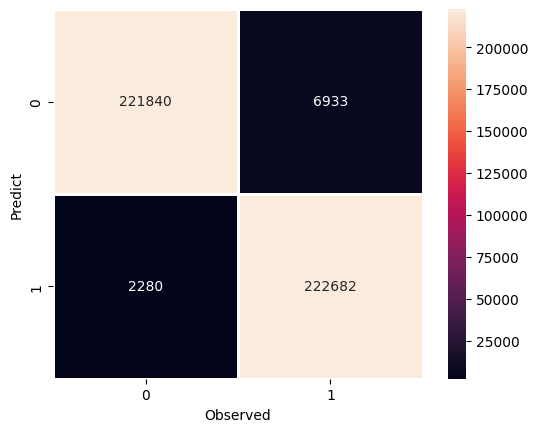

In [10]:
out1_pred = ultron_real1.predict(train_in1n)

out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_train_out1n.inverse_transform(out1_pred_df)


save_classifaction_report(train_out1_real,out_des_pred1,'./ann_models/after_data_filling/real_filled/reports/ultron_real1_train_report.csv')
plot_confusion_matrix(train_out1_real,out_des_pred1)


# **Case 2 - Taking away T-TPT & P-MON-CKP**
## **Using GridSearchCV to determine MLP parameters and train model - Case 2**

In [11]:
parameters2 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(4,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

ultron_real2 = train_model_if_doesnt_exist(train_in2n,train_out2n,parameters2,'./ann_models/after_data_filling/real_filled/ultron2_real2_PRP.pkl')

In [12]:
ultron_real2

MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 6),
              learning_rate='adaptive', max_iter=100)

Text(0, 0.5, 'erro')

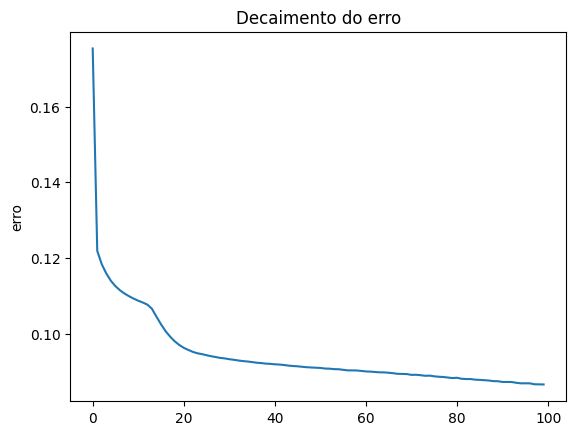

In [13]:
plt.plot(ultron_real2.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 2**

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.992283      0.944025  0.966599       0.968154       0.967863
recall         0.939691      0.992866  0.966599       0.966279       0.966599
f1-score       0.965271      0.967830  0.966599       0.966551       0.966566
support    96056.000000  98402.000000  0.966599  194458.000000  194458.000000


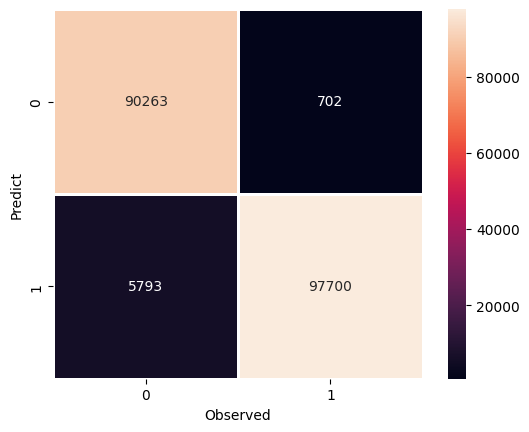

In [14]:
out2_pred = ultron_real2.predict(test_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_test_out2n.inverse_transform(out2_pred_df)

save_classifaction_report(test_out2_real,out_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real2_test_report.csv')
plot_confusion_matrix(test_out2_real,out_des_pred2)

### **Analising model with train data - case 2**


                     0.0            5.0  accuracy      macro avg  \
precision       0.992352       0.945835  0.967591       0.969093   
recall          0.941513       0.992945  0.967591       0.967229   
f1-score        0.966264       0.968818  0.967591       0.967541   
support    223674.000000  230061.000000  0.967591  453735.000000   

            weighted avg  
precision       0.968766  
recall          0.967591  
f1-score        0.967559  
support    453735.000000  


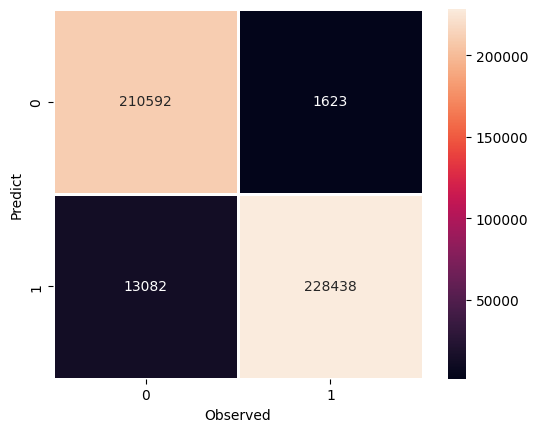

In [15]:
out2_pred = ultron_real2.predict(train_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_train_out2n.inverse_transform(out2_pred_df)

save_classifaction_report(train_out2_real,out_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real2_train_report.csv')
plot_confusion_matrix(train_out2_real,out_des_pred2)

# Case 3: Desconsiderando P-TPT e P-MON-CKP
### **Definindo parâmetros da rede com GridSearch - Caso 3**

In [16]:
ultron_real3 = train_model_if_doesnt_exist(train_in3n,train_out3n,parameters2,'./ann_models/after_data_filling/real_filled/ultron3_real3_PRP.pkl')

In [17]:
ultron_real3

MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 6), max_iter=100)

Text(0, 0.5, 'erro')

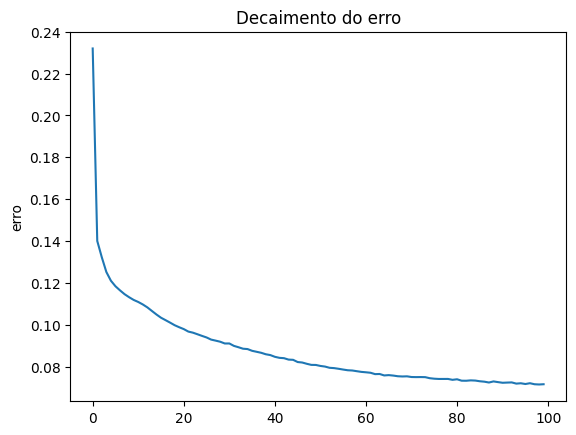

In [18]:
plt.plot(ultron_real3.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 3**

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.991843      0.951515  0.970482       0.971679       0.971363
recall         0.947819      0.992446  0.970482       0.970132       0.970482
f1-score       0.969331      0.971550  0.970482       0.970440       0.970458
support    95705.000000  98753.000000  0.970482  194458.000000  194458.000000


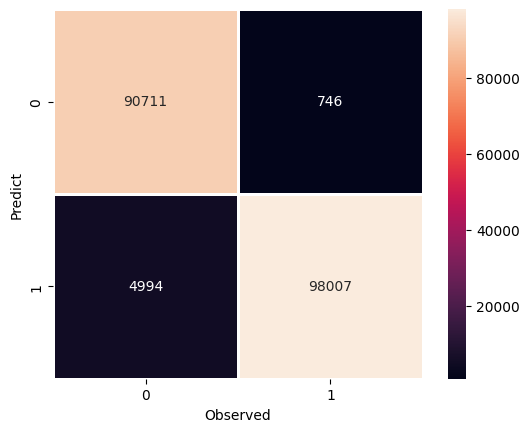

In [19]:
out3_pred = ultron_real3.predict(test_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_test_out3n.inverse_transform(out3_pred_df)

save_classifaction_report(test_out3_real,out_des_pred3,'./ann_models/after_data_filling/real_filled/reports/ultron_real3_test_report.csv')
plot_confusion_matrix(test_out3_real,out_des_pred3)



### **Analising model with train data - case 3**

                     0.0            5.0  accuracy      macro avg  \
precision       0.980660       0.962333  0.971197       0.971497   
recall          0.960607       0.981525  0.971197       0.971066   
f1-score        0.970530       0.971834  0.971197       0.971182   
support    224025.000000  229710.000000  0.971197  453735.000000   

            weighted avg  
precision       0.971382  
recall          0.971197  
f1-score        0.971190  
support    453735.000000  


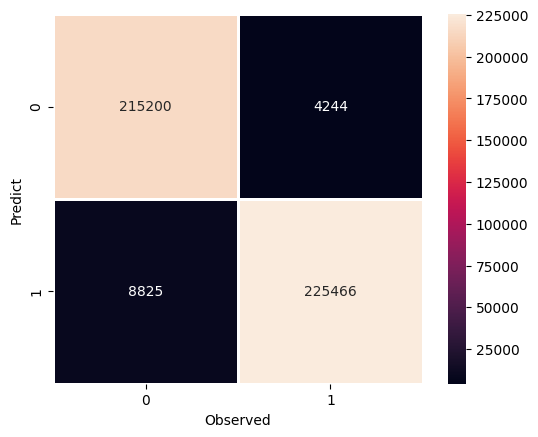

In [20]:
out3_pred = ultron_real3.predict(train_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_train_out3n.inverse_transform(out3_pred_df)

save_classifaction_report(train_out3_real,out_des_pred3,'./ann_models/after_data_filling/real_filled/reports/ultron_real3_train_report.csv')
plot_confusion_matrix(train_out3_real,out_des_pred3)